<a href="https://www.bigdatauniversity.com"><img src = "https://ibm.box.com/shared/static/jvcqp2iy2jlx2b32rmzdt0tx8lvxgzkp.png" width = 300, align = "center"></a>
<h1 align="center"> Non Linear Regression </h1><br>

<div class="alert alert-block alert-info" style="margin-top: 20px">
<font size = 3><strong>In this section we will overview the Non Linear Regression and using TensorFlow for Non Linear Regression</strong></font>
<br>
- <p><a href="#ref1">Non Linear Regression</a></p>
- <p><a href="#ref1.1">Link function </a></p>
    * <a href="#ref1.2">sigmoid</a>
    * <a href="#ref1.3">Log</a>
- <p><a href="#ref2">Non Linear Regression with TensorFlow</a></p>
    * <a id="#ref2.1"> Explore the Data</a>
    * <a href="#ref2.3">Model setup in TensorFlow</a>
    * <a href="#ref2.4">Loss function setup  in TensorFlow</a>
    * <a href="#ref2.5">Training the model</a>

</div>
<br>

---------

<a id="ref1"></a>
## Non Linear Regression
<h6>Let's learn about non linear regressions and apply an example on TensorFlow</h6>

Importing some libraries

In [3]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline

Non-linear regressions are a relationship between independent variables $x$ and a dependent variable $y$ which result in a non-linear function modeled data. Essentially any relationship that is not linear can be termed as non-linear, and is usually represented by the polynomial of $k$ degrees (maximum power of $x$). This expression can be further transformed on the right side of the equation with function which are called as **link** functions denoted by $f$. some of the well-known link functions are sigmoid ( also known as logit in statistics world), log, log-complmentary-log, and exponential. 

\begin{equation}
y = f(\beta_0+ \beta_1 x + \beta_2 x^2 +...+\beta_k x^k) \dots \ (1)
\end{equation}
where, $\beta_i$'s are parameters to be estimated that makes the model fit perfectly to the underlying data.
Let us consider one of the simple scenario where the degrees of the non-linear polynomial regression is 2(quadratic) and 3(cubic), and the link function is **identity**, so the equation is written simply as: 
$$y = \beta_0+ \beta_1 x + \beta_2 x^2 +...+\beta_k x^k $$

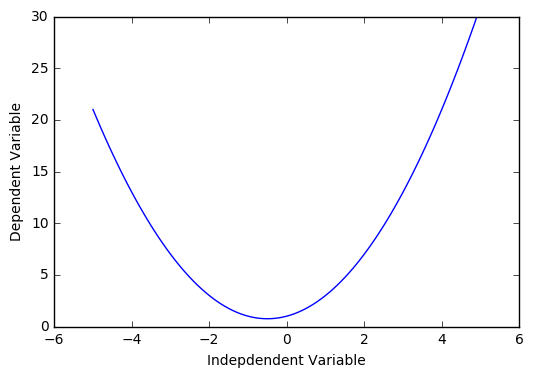

In [2]:
x = np.arange(-5.0, 5.0, 0.1)

## Please feel free to change the parameters
beta0=1
beta1=1
beta2=1   # this represents quadratic term
beta3=0  # this represents cubic term

y= beta0 + beta1*x + beta2*(x**2)+ beta3*(x**3)

plt.plot(x,y) 
plt.ylabel('Dependent Variable')
plt.xlabel('Indepdendent Variable')
plt.show()

As you can see, this function has $x^3$ and $x^2$ as independent variables. Also, the graphic of this function is not a straight line over the 2D plane. So this is a non-linear function.

<a id="ref1.1"></a>
### Link function: 
The function $f$ represented in equation $(1)$ is a link function or also refered to as activation function in machine-learning world. Note that the activation function always get linear input whereas here we can give non-linear inputs to the function: There few highly used such link functions like sigmoid, log, complementary log-log, Gaussian, or Identity function; any other form of such function would be sub-case of these functions or an apparent of inverse of the these functions. 

<a id="ref1.2"></a>
#### sigmoid
Sigmoid is a transformation and it is expressed as follows
\begin{equation}
y = \frac{1}{1+e^{-X}}  \dots \ (2)
\end{equation}
whereas, $X$ is $ (\beta_0+ \beta_1 x + \beta_2 x^2 +...+\beta_k x^k) $. This link function restricts the response between values 0 to 1.  There are many different forms of these sigmoid link functions which would map the inputs (a.k.a independent variables: $x$) to output (a.k.a dependent variable $y$) between -1 to 1, which is perferred in machine learning world.

For now we would be working with simplest case of this sigmoid function on the one degree polynomial function denoted in the equation $(2)$ as : $ y = \frac{1}{1+e^{-x}} $. ** Make sure to work with different degrees of polynomial function with in it**

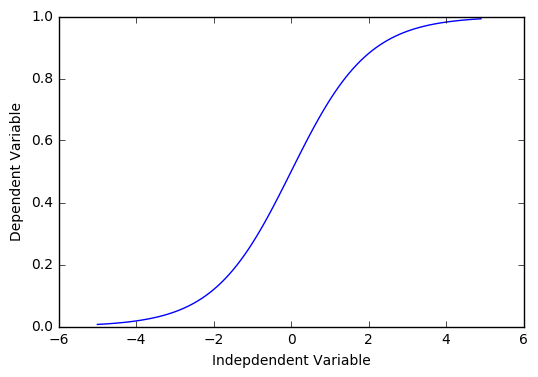

In [3]:
x = np.arange(-5.0, 5.0, 0.1)

## Please feel free to change the parameters
beta0=0
beta1=1
beta2=0   # this represents quadratic term
beta3=0  # this represents cubic term


X =  beta0 + beta1*x + beta2*(x**2)+ beta3*(x**3)

# linking function.
y = 1/(1+np.exp(-X))

plt.plot(x,y) 
plt.ylabel('Dependent Variable')
plt.xlabel('Indepdendent Variable')
plt.show()

<a id="ref1.3"></a>
#### Log
The response $y$ is a results of applying logarithmic map from input $x$'s to output variable $y$, in general form it would be written as  
\begin{equation}
y = \log(X)
\end{equation}

conditional on  $X$ being positive, whereas, as described in previous section $X$ is polynomial representation of the $x$'s. One of the simplest form of the above relationship would be with polynomial with 1 degree, and no parameters to be estimated i.e. $$ y = \log(x)$$

**Note: try out few beta parameters with non-zero-values to see the effect on curve **

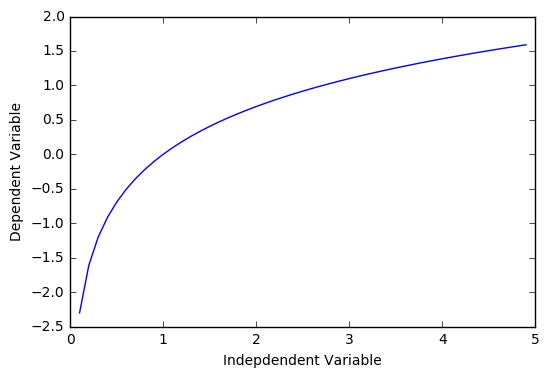

In [4]:
x = np.arange(0.1, 5.0, 0.1)

## Please feel free to change the parameters
beta0=0
beta1=1
beta2=0   # this represents quadratic term
beta3=0  # this represents cubic term

X = beta0 + beta1*x + beta2*(x**2)+ beta3*(x**3)

# mapping via link function
y = np.log(X)

plt.plot(x,y) 
plt.ylabel('Dependent Variable')
plt.xlabel('Indepdendent Variable')
plt.show()

<a id="ref2"></a>
# Non-Linear Regression with TensorFlow

In this section we would be looking at the use of tensorflow paradigm by building the session and then training the model using data. The process of training involves optimizing the loss functions  using techniques such as gradient descent approach and find the best possible solutions for the parameters of interest. 

    
The following data is from Fernandez-Juricic, et al. (2003). The study examined the effect of human disturbance on the nesting of house sparrows (Passer domesticus). Breeding pairs of birds ("pairs") per hectare were counted in 23 parks in Madrid, Spain. They also counted the number of people walking through the park per hectare per minute ("pedestrians"). The relationship is nonlinear and nonmonotonic, as shown by a scatterplot. 

In [1]:
import pandas as pd

# #downloading dataset
## !wget -nv -O /resources/data/china_gdp.csv https://ibm.box.com/shared/static/ccd2tu4wvkwi1f6yp4mm1ztsyt1ygphv.csv
# df = pd.read_csv("/resources/data/china_gdp.csv")

# JAG this is to be switche with DSWB path
df = pd.read_csv("https://ibm.box.com/shared/static/7tr6tai74kdk3vik815k2frl54kfuw4h.csv")

df.head()

,pedestrian,pairs
0,1.75,14.2
1,5.83,30.1
2,5.33,71.2
3,4.67,77.5
4,7.17,75.9


<a id="ref2.1"></a>
### Explore the Data
The data corresponds to determination of the age by the length of the fish, each data point is the measurement on a fish. Its kind of looks like an exponential function. The growth starts off slow, then from 2005 on forward, the growth is very significant. And finally, it deaccelerates slightly in the 2010s.

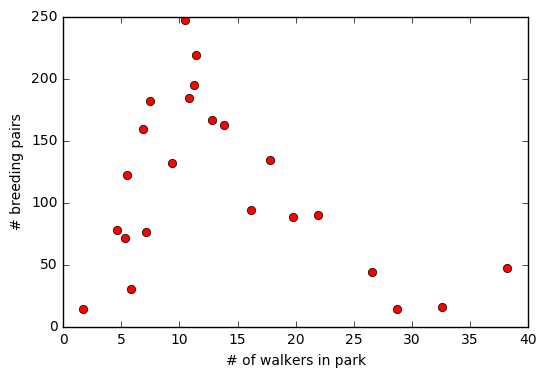

In [4]:
x_data, y_data = (df["pedestrian"].values, df["pairs"].values)

# plots the data points
plt.plot(x_data, y_data, 'ro')

# label the axis
plt.xlabel("# of walkers in park")
plt.ylabel("# breeding pairs")

From an initial look at the plot, we determine that the three degree non-linear regression function could be a good approximation. As the data shows more than 2 curvatures, we can start 3 degree polynomial regression
let us fit the data with an arbitrary 3rd degree polynomial model


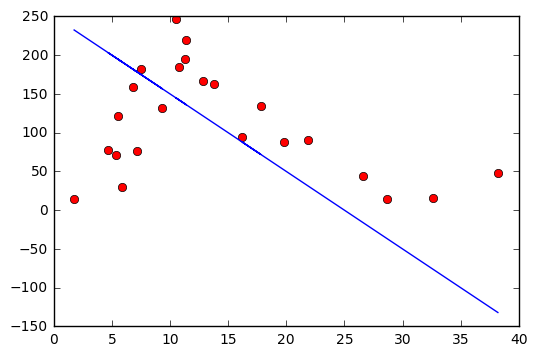

In [356]:
## Please feel free to change the parameters
x = x_data
beta0=250    # represents the intercept on yaxis
beta1=-10.0   # represents the slope of the line
beta2= 0   # this represents quadratic term
beta3=-0.0  # this represents cubic term


y =  beta0 + beta1*x + beta2*(x**2)+ beta3*(x**3)

plt.plot(x_data,y_data,'ro')
plt.plot(x_data,y)

<a id="ref2.3"></a>
### Model setup in TensorFlow
Now, let's build our regression model and initialize its parameters. 

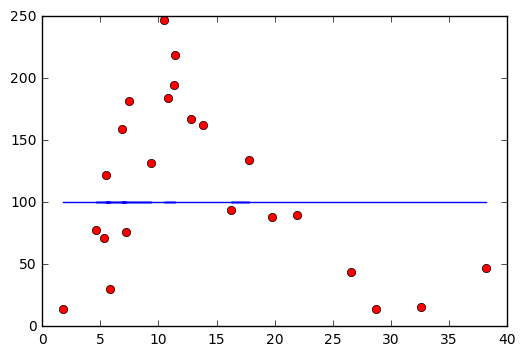

In [433]:
#input for the model, i.e, the 'X' variable
# note that placeholder implies that we have pass this parameter when we invoke the 
# tensorflow paradigm
x = tf.placeholder(tf.float32, shape=(x_data.size))
y = tf.placeholder(tf.float32,shape=(y_data.size))

# tf.Variable call creates a  single updatable copy in the memory and efficiently updates 
# the copy to relfect any changes in the variable values through out the scope of the tensorflow session
beta_0 = tf.Variable(100.0)
beta_1 = tf.Variable(0.0)
beta_2 = tf.Variable(0.0)
beta_3 = tf.Variable(0.0)


y_pred = tf.add(  beta_0,
                    tf.add( tf.mul(beta_1,x), 
                           tf.add( tf.mul(beta_2, tf.mul(x,x)),
                                  tf.mul(beta_3, tf.mul(x,tf.mul(x,x))))))


#create session and initialize variables
session = tf.Session()
session.run(tf.initialize_all_variables())

#get prediction with initial parameter values
pred = session.run(y_pred, feed_dict={x:x_data, y:y_data})

#plot initial prediction against datapoints
plt.plot(x_data, pred)
plt.plot(x_data, y_data, 'ro')

Above, as you can see that the our model setup using TensorFlow operator is successful and the plots produced in same as that we saw in the earlier section. Now, we are going to define a loss function for our regression, so we can train our model to better fit our data. We use mean squared error as our loss function, there are multiple different loss criterias that can be optimized which are based on the distance metric between predicted and the true values of the $Y$

$$ loss = \frac{1}{n}\sum_{i=1}^n{[Y_i - \hat{Y}_i]^2} $$



<a id="ref2.4"></a>
### Loss function setup  in TensorFlow

Let us setup the loss function based on the TensorFlow functions, and then have a trial run of the session to see if the loss is calculated without any errors.

In [537]:
# normalization factor
nf = 1e-1
# loss = tf.reduce_mean(tf.squared_difference(Y_pred * nf, Y * nf))
# seting up the loss function
loss = tf.reduce_mean(tf.squared_difference(y_pred*nf,y*nf))

# check you loss function setup
session.run(loss, feed_dict={x:x_data,y:y_data})

36.675976


Now, we bind our loss function to a Gradient Descent Optimizer and *test the learning-rate by re-running the box below  2 to 3 times*. If the loss starts to increase then its good idea to reduce your learning-rate or by reducing the normalization fractor in the above step. Note these gradient optimizations when its comes to non-linear model can be pretty unstable depending on how what is the step-size in the optimization. The gradient Descent optimizer takes in parameter: learning rate, which corresponds to the speed with which the optimizer should learn; there are pros and cons for increasing the learning-rate parameter, training model converges quickly, whereas there is risk of optimizer getting stuck into local optimum solutions **Please feel free to make changes to learning parameter and check its effect**. On the other hand decreasing the learning rate might reduce the convergence speed, but would improve on the optimal solution by not getting stuck in local optimal solutions. Please review other material for further information on the optimization. 


In [544]:
# optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.000021)
optimizer = tf.train.AdagradOptimizer(0.01 )

# pass the loss function that optimizer should optimize on.
train = optimizer.minimize(loss)

session.run(tf.initialize_all_variables())


In [574]:
out_i, loss_i= session.run([train,loss], feed_dict={x:x_data,y:y_data})


print loss_i

41.3468


Once we are happy with your **learning-rate** and **normalization** heuristic parameters we can go ahead and iteratively call the optimizer until the convergence. The number of iterations should be finite and we keep it 1000000$^{th}$ iteration or when the loss change is less than 1e-7 (or any smaller number). One can alway come back to this iteration and change the convergence factor; Note that we have used adaGradOptimizer, which is suppposed to be very robust optmizer and can be very liberal in accepting what learning-rate you want to give to it. 

In [579]:
losses = [float("Inf")]
epoch = 1000000
#training loop
for steps in  xrange(epoch):
    losses.append(session.run([train, loss], feed_dict={x:x_data,y:y_data})[1])
    #stop training if loss starts changing by less than 1e-7
    if abs(losses[-1] - losses[-2]) < 10^-7:
        break
#     if steps%10000 == 0:
#         print "steps = %d  loss = %f"%(steps,losses[steps])
        
print "steps = %d loss = %f"%(steps,losses[steps])

steps = 999999 loss = 24.650187


Now we plot our resulting regresssion model.

<a id="ref2.5"></a>
### Training the model 

Now we make one more call to $session.run$ which doesn't call the $"loss"$ function instead it just predicts the x for various values of $y$. Note that the optimization hasn't converged yet, and seems to have been still reducing at a slower rate. Given enough time one would definitely reach a much better solution than what we have got. 

beta_0 = 80.266495, beta_1 = 15.065886, beta_2 = -0.967583, beta_3 = 0.013988


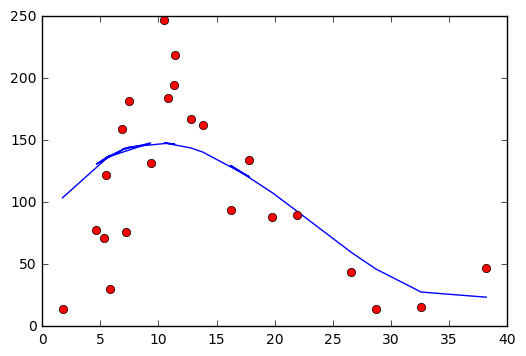

In [582]:
#get prediction with trained model
pred,b0, b1, b2, b3 = session.run([y_pred, beta_0, beta_1, beta_2, beta_3], feed_dict={x:x_data,y:y_data})

#plot the prediction against the datapoints
plt.plot(x_data, pred)
plt.plot(x_data, y_data, 'ro')

#print the final parameters
print"beta_0 = %f, beta_1 = %f, beta_2 = %f, beta_3 = %f" % (b0,b1, b2, b3)

And below we can see how the loss function changes over the training loop.

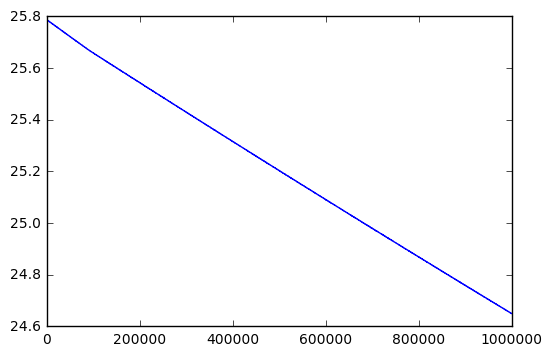

In [581]:
plt.plot(losses)

### Author

Created by Jagadish Rangrej

## Reference

https://www.tensorflow.org/versions/r0.9/tutorials/mnist/beginners/index.html
<br />
https://en.wikipedia.org/wiki/Softmax_function
<br />
https://www.tensorflow.org/versions/r0.9/api_docs/python/nn.html#classification

Fernandez-Juricic, E., A. Sallent, R. Sanz, and I. Rodriguez-Prieto. 2003. Testing the risk-disturbance hypothesis in a fragmented landscape: non-linear responses of house sparrows to humans. Condor 105: 316-326.